<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request

In [ ]:
url = 'https://dapi.kakao.com/v3/search/book'  #OpenAPI 서비스 제공URL
target_param = "target=title"  #전달 인자
page_param = "page=2"  #전달 인자
query_in = input("검색 질의:")
query_param = "query=" + urllib.parse.quote(query_in)  #utf-8로 인코딩, 전달 인자

query_str = url + '?' + target_param + '&' + query_param + '&' + page_param  #쿼리문자열

print(query_str)

request = urllib.request.Request(query_str)  #서비스 요청에 사용할 개체를 생성
request.add_header("Authorization", "KakaoAK 1e93a10ce73cf9bb9a37f45fc5f42576")  #발급받은RESTAPI키
response = urllib.request.urlopen(request)  #웹 서버에 요청
res = response.read().decode('utf-8')
print(res)

In [ ]:
import json
jd = json.loads(res)
print(jd)

In [ ]:
import pandas as pd
df = pd.json_normalize(jd['documents'])
df

In [ ]:
df.info()

In [ ]:
url = 'https://openapi.naver.com/v1/search/book.xml'
query_in = input("검색 질의:")
query_param = "query=" + urllib.parse.quote(query_in)  #utf-8로 인코딩
query_str = url + '?' + query_param

print(query_str)

request = urllib.request.Request(query_str)  #서비스 요청에 사용할 개체를 생성
request.add_header('X-Naver-Client-Id', 'RiilUVG9Ru7KhU3XGnRB')
request.add_header('X-Naver-Client-Secret', 'b8AhXiwLQr')

response = urllib.request.urlopen(request)
res = response.read().decode('utf-8')
print(res)

In [ ]:
df = pd.read_xml(res, xpath=".//item")
df.info()

In [ ]:
import matplotlib.pyplot as plt
df.price.plot()
plt.show()

In [ ]:
des_str = df.description[0]
des_str

In [ ]:
demo_str = "abc 123 cas$ asd# cr"
target_str = ""
for ch in demo_str:
    if ch.isalnum() or ch.isspace():
        target_str = target_str + ch
print(target_str)
target_str = "".join(char for char in demo_str if (char.isalnum() or char.isspace()))
print(target_str)

In [ ]:
filter_str = "".join(char for char in des_str if(char.isalnum() or char.isspace()) and char != ' * ')
print(filter_str)
words = filter_str.split(' ')
s = pd.Series(words)
s.value_counts()

In [12]:
from wordcloud import WordCloud

In [13]:
src = """
NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
"""

filter_str = """
이것은 유용한 판다 레시피에 대한 짧고 달콤한 예제와 링크를 위한 저장소입니다. 사용자가 이 문서에 추가할 것을 권장합니다.

이 섹션에 흥미로운 링크 및/또는 인라인 예제를 추가하는 것은 훌륭한 First Pull Request 입니다.

Stack-Overflow 및 GitHub 링크를 보강하기 위해 단순화되고 압축된 새로운 사용자 친화적인 인라인 예제가 가능한 곳에 삽입되었습니다. 많은 링크에는 인라인 예제가 제공하는 것 이상의 확장된 정보가 포함되어 있습니다.

pandas(pd) 및 NumPy(np)는 두 개의 축약된 가져오기 모듈뿐입니다. 나머지는 신규 사용자를 위해 명시적으로 가져온 상태로 유지됩니다.
"""

In [ ]:
wc = WordCloud()
wc.generate(src)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

In [ ]:
!sudo apt-get install -y fonts-nanum # 한글 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font',family='NanumBarunGothic')
plt.title("테스트")
plt.show()

In [ ]:
import matplotlib.font_manager as fm
sf = fm.findSystemFonts()
[f for f in sf if 'Nanum' in f]

In [ ]:
from bs4 import BeautifulSoup
url = 'https://ehpub.co.kr'

response = urllib.request.urlopen(url)
res = response.read().decode('utf-8')

hre = BeautifulSoup(res, 'html.parser')

wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf')
wc.generate(hre.body.text)
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf')
wc.generate(filter_str)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

# 시각화 분석 실습

In [20]:
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/module/train_titanic.csv'
df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?

In [22]:
sur_data = df['Survived']
svc = sur_data.value_counts()
print(f"인원:{sur_data.count()} 사망자:{svc.values[0]} 생존자:{svc.values[1]}")

인원:891 사망자:549 생존자:342


2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.


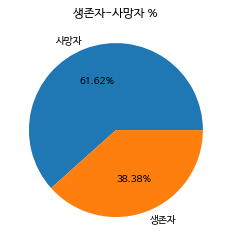

In [23]:
labels = ["사망자", "생존자"]
plt.pie(svc, labels = labels, autopct='%.2f%%')
plt.title("생존자-사망자 %")
plt.show()

3. 결측데이터가 있는 컬럼들을 조사하시오.

In [24]:
age = df['Age'].isnull().value_counts()
cabin = df['Cabin'].isnull().value_counts()
embarked = df['Embarked'].isnull().value_counts()
print(age)
print("--------------------------")
print(cabin)
print("--------------------------")
print(embarked)

False    714
True     177
Name: Age, dtype: int64
--------------------------
True     687
False    204
Name: Cabin, dtype: int64
--------------------------
False    889
True       2
Name: Embarked, dtype: int64


4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.

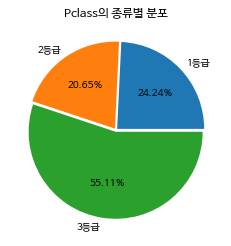

In [25]:
dvc = df.Pclass.value_counts().sort_index()  # df['Pclass'}]==df.Pclass
labels = ["1등급", "2등급", "3등급"]
plt.pie(dvc, labels = labels, autopct='%.2f%%', explode = [0.02, 0.02, 0.02])
plt.title("Pclass의 종류별 분포")
plt.show()

5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

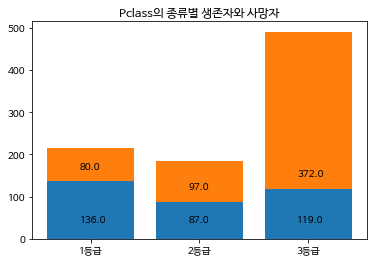

In [26]:
pdata = df.Pclass
cn = len(pdata.unique())
pc_alive_arr = np.zeros(cn)
pc_dead_arr = np.zeros(cn)
for index in range(len(pdata)):
    pi = pdata[index]-1  #Pclass는 1,2,3  ->  0,1,2로 변환
    if sur_data[index] == 0:  #사망자일 때
        pc_dead_arr[pi] += 1
    else:  #생존자일 때
        pc_alive_arr[pi] += 1

labels = ['1등급', '2등급', '3등급']
plt.bar(labels, pc_alive_arr)
plt.bar(labels, pc_dead_arr, bottom = pc_alive_arr)
for i in range(cn):
    plt.annotate(str(pc_alive_arr[i]), (-0.1+i, 40))
    plt.annotate(str(pc_dead_arr[i]), (-0.1+i, pc_alive_arr[i]+30))
plt.title("Pclass의 종류별 생존자와 사망자")
plt.show()

6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.

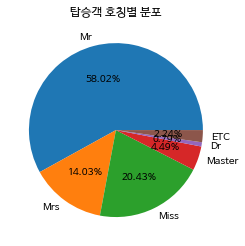

In [27]:
names_values = ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'ETC']
def get_name_index(name):
    first, second = name.split(',')  #콤마 기준으로 분리
    foos = second.split('.')  #마침표를 기준으로 분리
    tn = foos[0].replace(' ', '')  #공백은 제거
    for index, nv in enumerate(names_values):
        if nv == tn:
            return index
    return 5
#ni = get_name_index(df.Name[0])
#print(f"{df.Name[0]}:{names_values[ni]}")

n_cnts = np.zeros(6)
for i, name in enumerate(df.Name):
    ni = get_name_index(name)
    n_cnts[ni] += 1
#print(n_cnts)

plt.pie(n_cnts, labels = names_values, autopct='%.2f%%')
plt.title("탑승객 호칭별 분포")
plt.show()

7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

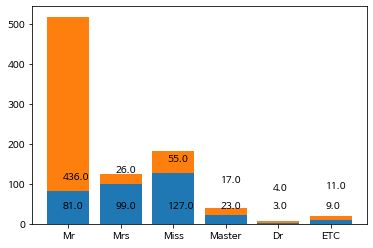

In [28]:
pn_alive_arr = np.zeros(6)
pn_dead_arr = np.zeros(6)
for i, name in enumerate(df.Name):
    ni = get_name_index(name)
    if sur_data[i] == 0:
        pn_dead_arr[ni] += 1
    else:
        pn_alive_arr[ni] += 1
plt.bar(names_values, pn_alive_arr)
plt.bar(names_values, pn_dead_arr, bottom = pn_alive_arr)
for i in range(6):
  plt.annotate(str(pn_alive_arr[i]),(-0.1+i,40))
  if pn_alive_arr[i]<40:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i,pn_alive_arr[i]+80))
  else:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i,pn_alive_arr[i]+30))
plt.show()

8. 성별로 분포를 파이 그래프로 나타내시오.

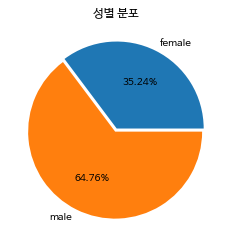

In [29]:
svc = df.Sex.value_counts().sort_index()
plt.pie(svc, labels = ['female', 'male'], autopct='%.2f%%', explode = [0.02, 0.02])
plt.title("성별 분포")
plt.show()

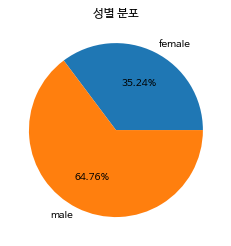

In [30]:
sex_values = ['female', 'male']
def get_sex_index(sex):
    if sex == 'female':
        return 0
    return 1

s_cnts = np.zeros(2)
for i, sex in enumerate(df.Sex):
    si = get_sex_index(sex)
    s_cnts[si] += 1

plt.pie(s_cnts, labels = sex_values, autopct='%.2f%%')
plt.title("성별 분포")
plt.show()

9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

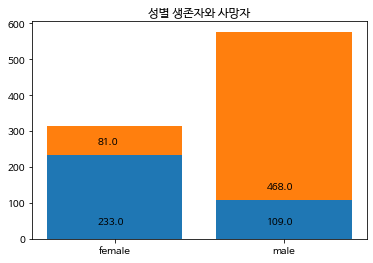

In [31]:
sdata = df.Sex
sn = len(sdata.unique())
s_alive_arr = np.zeros(sn)
s_dead_arr = np.zeros(sn)
for index in range(len(sdata)):
    if sdata[index] == 'female':
        si = 0
    else:
        si = 1
    if sur_data[index] == 0:  #사망자일 때
        s_dead_arr[si] += 1
    else:  #생존자일 때
        s_alive_arr[si] += 1

labels = ['female', 'male']
plt.bar(labels, s_alive_arr)
plt.bar(labels, s_dead_arr, bottom = s_alive_arr)
for i in range(sn):
    plt.annotate(str(s_alive_arr[i]), (-0.1+i, 40))
    plt.annotate(str(s_dead_arr[i]), (-0.1+i, s_alive_arr[i]+30))
plt.title("성별 생존자와 사망자")
plt.show()

10. 나이를 5살 범위로 17단계로(0 ~ 5, 5 ~ 10,...,80 ~ 85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 평균나이로 처리하시오.)

In [32]:
#df["Age"].isna().sum()
#df["Age"].describe()

mv = df['Age'].mean()  #평균
ad = df['Age'].fillna(mv)  #결측치 평균값으로 채움
#ad.isnull().value_counts()

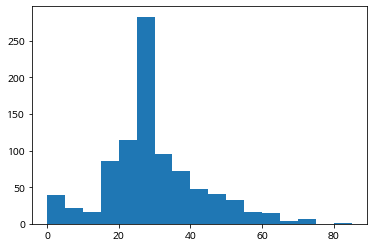

(array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
         16.,  15.,   4.,   6.,   0.,   1.]), <a list of 17 Patch objects>)

In [33]:
#1
n, _, _ = plt.hist(ad, bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])  #n값 말고는 필요없음 bins, patches -> _로 생략
plt.show()
n, _

In [34]:
#2
age_values = np.zeros(17)
for i, age in enumerate(ad):
    ai = age//5
    ai = int(ai)  #타입이 int이어야 인덱스로 사용 가능 float->int 형변환
    age_values[ai] += 1
age_values

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

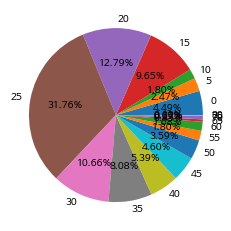

In [35]:
plt.pie(age_values, labels=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80'], autopct="%.2f%%")
plt.show()

11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

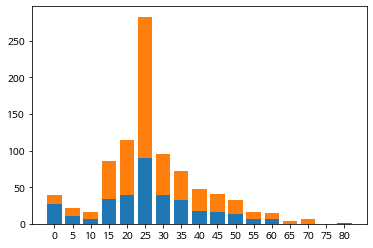

00~05:040
05~10:022
10~15:016
15~20:086
20~25:114
25~30:283
30~35:095
35~40:072
40~45:048
45~50:041
50~55:032
55~60:016
60~65:015
65~70:004
70~75:006
75~80:000
80~85:001


In [36]:
a_alive_arr = np.zeros(17)
a_dead_arr = np.zeros(17)
for index in range(len(ad)):
    ai = ad[index]//5
    ai = int(ai)

    if sur_data[index] == 0:  #사망자일 때
        a_dead_arr[ai] += 1
    else:  #생존자일 때
        a_alive_arr[ai] += 1

labels=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
plt.bar(labels, a_alive_arr)
plt.bar(labels, a_dead_arr, bottom = a_alive_arr)
plt.show()

for i in range(17):
    print(f"{i*5:02d}~{(i+1)*5:-02d}:{age_values[i]:03.0f}")

12. SibSp 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

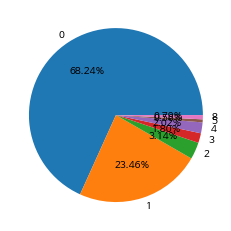

In [37]:
#df["SibSp"].describe()
svc = df.SibSp.value_counts().sort_index()
plt.pie(svc.values, labels=svc.index, autopct="%.2f%%")
plt.show()

13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

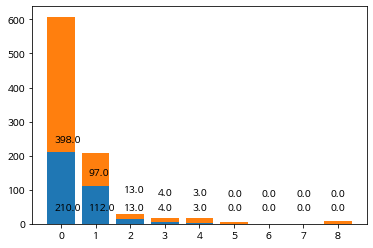

In [38]:
sdata = df.SibSp
sn = 9  #형제 자매 수를 인덱스로 사용하기 위해 0~8까지 9개를 사용
s_alive_arr = np.zeros(sn)
s_dead_arr = np.zeros(sn)
for index in range(len(sdata)):
    si = sdata[index]  #형제 자매 수를 얻어옴
    if sur_data[index] == 0:  #사망자일 때
        s_dead_arr[si] += 1
    else:  #생존자일 때
        s_alive_arr[si] += 1

labels = [str(i) for i in range(9)]
plt.bar(labels, s_alive_arr)
plt.bar(labels, s_dead_arr, bottom = s_alive_arr)
for i in range(sn):
    plt.annotate(str(s_alive_arr[i]), (-0.2+i, 40))
    if s_alive_arr[i] < 40:
        plt.annotate(str(s_alive_arr[i]), (-0.2+i, s_alive_arr[i]+80))
    else:
        plt.annotate(str(s_dead_arr[i]), (-0.2+i, s_alive_arr[i]+30))
plt.show()

14. Parch 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

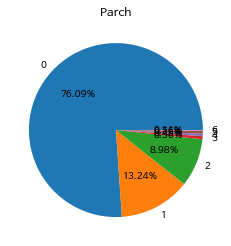

In [41]:
pvc = df.Parch.value_counts().sort_index()
plt.pie(pvc.values, labels=pvc.index, autopct="%.2f%%")
plt.title("Parch")
plt.show()

15. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

In [ ]:
pdata = df.Parch
pn = 7  #직계 자손, 조상 수를 인덱스로 사용하기 위해 0~6까지 7개를 사용
pc_alive_arr = np.zeros(pn)
pc_dead_arr = np.zeros(pn)
for index in range(len(pdata)):
    pi = pdata[index]  #직계 자손, 조상 수
    if sur_data[index] == 0:  #사망자일 때
        pc_dead_arr[pi] += 1
    else:  #생존자일 때
        pc_alive_arr[pi] += 1

labels = [str(i) for i in range(pn)]  #['0','1','2',...,'6']
plt.bar(labels, pc_alive_arr)
plt.bar(labels, pc_dead_arr, bottom = pc_alive_arr)
for i in range(pn):
    plt.annotate(str(pc_alive_arr[i]), (-0.2+i, 40))
    if pc_alive_arr[i] < 40:
        plt.annotate(str(pc_alive_arr[i]), (-0.2+i, pc_alive_arr[i]+80))
    else:
        plt.annotate(str(pc_dead_arr[i]), (-0.2+i, pc_alive_arr[i]+30))
plt.show()

16. 승선한 항구(Embarked 컬럼)에 따른 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 'N'으로 마킹하시오.)

In [45]:
df.Embarked.isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [46]:
edata = df.Embarked.fillna('N')
edata.isnull().value_counts()

False    891
Name: Embarked, dtype: int64

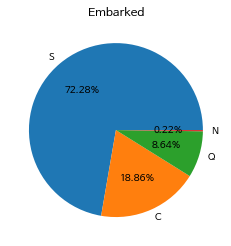

In [47]:
evc = edata.value_counts()
plt.pie(evc.values, labels=evc.index, autopct="%.2f%%")
plt.title("Embarked")
plt.show()

17. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

In [48]:
len(edata.unique())

4

In [49]:
evc.index

Index(['S', 'C', 'Q', 'N'], dtype='object')

In [50]:
def get_embarked_index(embarked):
    if embarked == 'S':
        return 0
    if embarked == 'C':
        return 1
    if embarked == 'Q':
        return 2
    if embarked == 'N':
        return 3

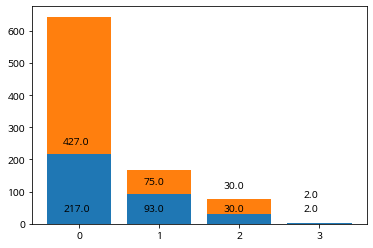

In [51]:
en = len(edata.unique())  #승선한 항구 수
ec_alive_arr = np.zeros(en)
ec_dead_arr = np.zeros(en)
for index in range(len(edata)):
    ei = get_embarked_index(edata[index])  #embarked의 인덱스 얻어옴
    if sur_data[index] == 0:  #사망자일 때
        ec_dead_arr[ei] += 1
    else:  #생존자일 때
        ec_alive_arr[ei] += 1

labels = [str(i) for i in range(en)]  #['0','1','2','3']
plt.bar(labels, ec_alive_arr)
plt.bar(labels, ec_dead_arr, bottom = ec_alive_arr)
for i in range(en):
    plt.annotate(str(ec_alive_arr[i]), (-0.2+i, 40))
    if ec_alive_arr[i] < 40:
        plt.annotate(str(ec_alive_arr[i]), (-0.2+i, ec_alive_arr[i]+80))
    else:
        plt.annotate(str(ec_dead_arr[i]), (-0.2+i, ec_alive_arr[i]+30))
plt.show()